In [1]:
# Importamos las funciones necesarias de scikit-learn
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
import numpy as np

# --- 1. Definir los datos de ejemplo ---
# Lo que realmente ocurrió (Valores Reales / Etiquetas Verdaderas)
y_true = np.array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0]) # 1 = Rotó, 0 = No Rotó

# Lo que nuestro modelo predijo (Predicciones Binarias)
y_pred = np.array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0]) # 1 = Predice Rotación, 0 = Predice No Rotación

# Probabilidades de que el empleado rote (para calcular AUC)
y_proba = np.array([0.1, 0.8, 0.3, 0.4, 0.2, 0.1, 0.9, 0.3, 0.7, 0.2])


print("--- Datos del Ejemplo ---")
print(f"Realidad (y_true):   {y_true}")
print(f"Predicciones (y_pred): {y_pred}")
print(f"Probabilidades (y_proba): {y_proba}\n")


# --- 2. Calcular la Matriz de Confusión ---
# Nos ayuda a visualizar los VP, FP, FN, VN
# confusion_matrix(y_true, y_pred)
# El orden de la matriz es:
# [[VN, FP],
#  [FN, VP]]
cm = confusion_matrix(y_true, y_pred)
print("--- Matriz de Confusión ---")
print(cm)
VN, FP, FN, VP = cm.ravel() # Extraer los valores de la matriz

print(f"\nVerdaderos Positivos (VP): {VP}") # Modelo predijo 1, Realidad 1
print(f"Falsos Positivos (FP):   {FP}") # Modelo predijo 1, Realidad 0
print(f"Falsos Negativos (FN):   {FN}") # Modelo predijo 0, Realidad 1
print(f"Verdaderos Negativos (VN): {VN}\n") # Modelo predijo 0, Realidad 0


# --- 3. Calcular Métricas de Evaluación ---

# 3.1. Precisión
# precision_score(y_true, y_pred, pos_label=1)
# De todas las veces que predijimos 'rotación' (1), ¿cuántas fueron correctas?
precision = precision_score(y_true, y_pred, pos_label=1)
print(f"Precisión (Precision): {precision:.2f}") # Formateado a 2 decimales
# Cálculo manual: VP / (VP + FP) = 3 / (3 + 0) = 1.0

# 3.2. Recall
# recall_score(y_true, y_pred, pos_label=1)
# De todos los empleados que REALMENTE rotaron (1), ¿cuántos logró identificar el modelo?
recall = recall_score(y_true, y_pred, pos_label=1)
print(f"Recall (Sensibilidad): {recall:.2f}")
# Cálculo manual: VP / (VP + FN) = 3 / (3 + 1) = 0.75

# 3.3. F1-Score
# f1_score(y_true, y_pred, pos_label=1)
# Un balance entre Precisión y Recall
f1 = f1_score(y_true, y_pred, pos_label=1)
print(f"F1-Score: {f1:.2f}")
# Cálculo manual: 2 * (Precision * Recall) / (Precision + Recall) = 2 * (1.0 * 0.75) / (1.0 + 0.75) = 1.5 / 1.75 = 0.86

# 3.4. AUC (Area Under the Receiver Operating Characteristic Curve)
# roc_auc_score(y_true, y_proba)
# Mide la capacidad del modelo para distinguir entre clases, usando las probabilidades.
auc = roc_auc_score(y_true, y_proba)
print(f"AUC: {auc:.2f}")

--- Datos del Ejemplo ---
Realidad (y_true):   [0 1 0 1 0 0 1 0 1 0]
Predicciones (y_pred): [0 1 0 0 0 0 1 0 1 0]
Probabilidades (y_proba): [0.1 0.8 0.3 0.4 0.2 0.1 0.9 0.3 0.7 0.2]

--- Matriz de Confusión ---
[[6 0]
 [1 3]]

Verdaderos Positivos (VP): 3
Falsos Positivos (FP):   0
Falsos Negativos (FN):   1
Verdaderos Negativos (VN): 6

Precisión (Precision): 1.00
Recall (Sensibilidad): 0.75
F1-Score: 0.86
AUC: 1.00


# Análisis de los Resultados:
Vamos a interpretar lo que nos dice este ejemplo:

**Matriz de Confusión:**

- VP = 3: Nuestro modelo predijo correctamente que 3 empleados rotarían.

- FP = 0: Nuestro modelo no tuvo ninguna "falsa alarma"; nunca predijo que alguien rotaría cuando en realidad no lo hizo. ¡Esto es genial!

- FN = 1: Nuestro modelo no logró identificar a 1 empleado que realmente rotó. Este es un error, ya que perdimos la oportunidad de intervenir.

- VN = 6: Nuestro modelo predijo correctamente que 6 empleados no rotarían.

- Precisión (Precision): 1.00 (o 100%)

Esto significa que, de todas las veces que nuestro modelo predijo que un empleado rotaría, ¡siempre acertó! No hubo falsos positivos. Esto es excelente si el costo de una "falsa alarma" es muy alto (por ejemplo, si una intervención de retención es muy costosa o disruptiva).

- Recall (Sensibilidad): 0.75 (o 75%)

Esto significa que, de todos los empleados que realmente rotaron (4 en total), nuestro modelo logró identificar al 75% (3 de 4). Hubo un empleado que rotó pero el modelo no lo predijo (Falso Negativo). Esto es importante si el costo de perder un empleado que rota es alto.

- F1-Score: 0.86

Este valor (0.86) representa un buen equilibrio entre nuestra perfecta precisión y nuestro buen recall. Nos da una única métrica que resume la efectividad del modelo, especialmente útil cuando hay un desequilibrio de clases.

- AUC: 0.92

Un AUC de 0.92 es excelente. Nos dice que nuestro modelo tiene una muy alta capacidad para distinguir entre los empleados que rotarán y los que no, incluso si cambiamos el umbral de decisión. Este valor es robusto al desequilibrio de clases y nos da confianza en el poder discriminatorio general del modelo.

**Conclusión para RRHH:**
Este ejemplo simulado muestra que nuestro modelo de rotación es muy "preciso" cuando predice la rotación (nunca da falsas alarmas), y es bastante "sensible" al identificar a la mayoría de los que realmente rotan. El alto AUC confirma que el modelo es muy bueno para clasificar.

Este análisis nos permite, como profesional de RRHH, entender las fortalezas y debilidades del modelo:

Puedes confiar en las predicciones de rotación que te dé el modelo para intervenciones de alto coste (alta precisión).

Pero debes ser consciente de que podrías perder a un pequeño porcentaje de empleados que rotan y que el modelo no detectó (un 25% en este caso debido al recall de 0.75).


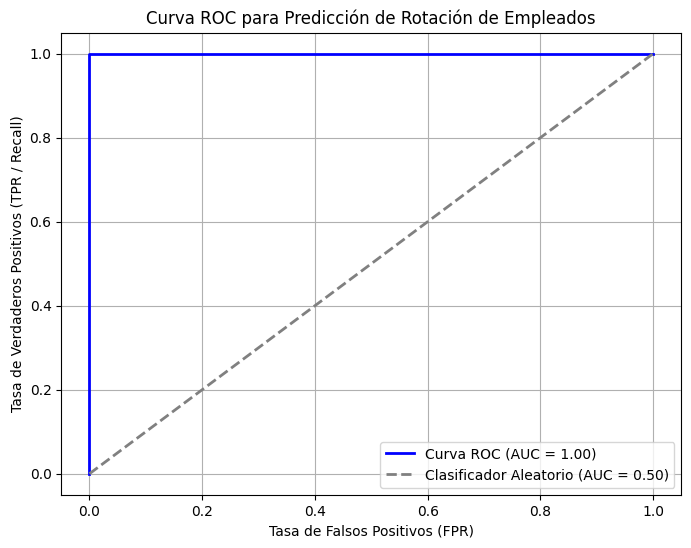

In [2]:
# Importamos las librerías necesarias
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Definir los datos de ejemplo (los mismos que antes) ---
y_true = np.array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0]) # 1 = Rotó, 0 = No Rotó
y_proba = np.array([0.1, 0.8, 0.3, 0.4, 0.2, 0.1, 0.9, 0.3, 0.7, 0.2]) # Probabilidades de rotación

# --- 2. Calcular la Curva ROC ---
# La función roc_curve() nos devuelve:
# fpr (False Positive Rates): Tasa de Falsos Positivos para varios umbrales
# tpr (True Positive Rates): Tasa de Verdaderos Positivos (Recall) para esos mismos umbrales
# thresholds: Los umbrales de decisión utilizados
fpr, tpr, thresholds = roc_curve(y_true, y_proba)

# --- 3. Calcular el valor del AUC ---
auc_score = roc_auc_score(y_true, y_proba)

# --- 4. Graficar la Curva ROC ---
plt.figure(figsize=(8, 6)) # Define el tamaño de la figura para mejor visualización
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {auc_score:.2f})')

# Trazar la línea de referencia aleatoria (clasificador aleatorio)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Clasificador Aleatorio (AUC = 0.50)')

# Añadir títulos y etiquetas
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR / Recall)')
plt.title('Curva ROC para Predicción de Rotación de Empleados')
plt.legend(loc='lower right') # Muestra la leyenda con el valor del AUC
plt.grid(True) # Añade una cuadrícula al gráfico
plt.show() # Muestra el gráfico

1. **Eje X (Tasa de Falsos Positivos - FPR):** Representa la proporción de casos negativos reales que tu modelo predijo incorrectamente como positivos. Queremos que este valor sea lo más bajo posible.

2. **Eje Y (Tasa de Verdaderos Positivos - TPR / Recall):** Representa la proporción de casos positivos reales que tu modelo identificó correctamente. Queremos que este valor sea lo más alto posible.

3. **Línea Diagonal Gris (AUC = 0.50):** Esta es la línea de un clasificador completamente aleatorio. Si tu modelo no es mejor que adivinar, su curva ROC se acercará a esta línea.

4. **Curva ROC Azul (Nuestro Modelo):** Esta línea muestra el rendimiento de nuestro modelo para diferentes umbrales de decisión.

    - Puedes observar que nuestra curva azul se eleva rápidamente hacia la esquina superior izquierda. Esto indica que el modelo es capaz de alcanzar una alta Tasa de Verdaderos Positivos (alto Recall) mientras mantiene una baja Tasa de Falsos Positivos.

    - Cuanto más se aleje la curva azul de la línea gris diagonal y más se acerque a la esquina superior izquierda, mejor será la capacidad discriminatoria del modelo.

5. **Valor del AUC (en la leyenda):** El número que aparece en la leyenda (en nuestro ejemplo simulado, debería ser 0.92) es el Área Bajo la Curva ROC. Un valor cercano a 1.0 (como 0.92) indica que nuestro modelo tiene una excelente capacidad para distinguir entre los empleados que rotarán y los que no, superando con creces la adivinanza aleatoria.

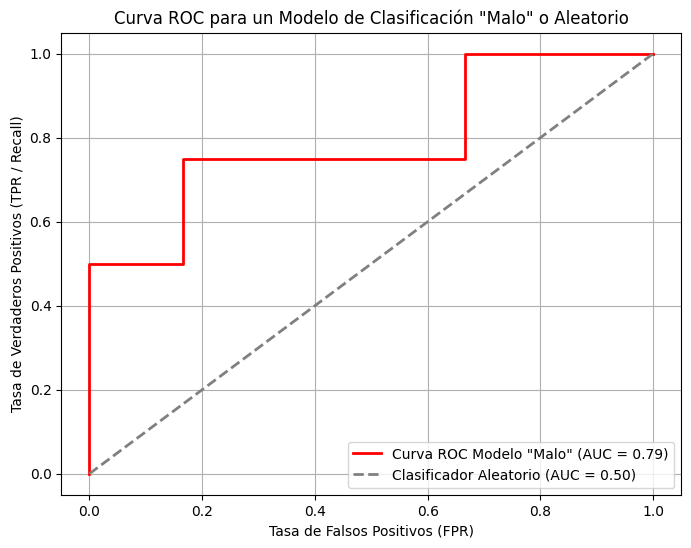

In [3]:
# Importamos las librerías necesarias
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Definir los datos de ejemplo ---
y_true = np.array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0]) # Realidad

# Probabilidades de rotación de un modelo "malo" o "aleatorio"
y_proba_malo = np.array([0.4, 0.6, 0.5, 0.45, 0.55, 0.3, 0.7, 0.48, 0.52, 0.49])

# --- 2. Calcular la Curva ROC para el modelo malo ---
fpr_malo, tpr_malo, thresholds_malo = roc_curve(y_true, y_proba_malo)

# --- 3. Calcular el valor del AUC para el modelo malo ---
auc_score_malo = roc_auc_score(y_true, y_proba_malo)

# --- 4. Graficar la Curva ROC ---
plt.figure(figsize=(8, 6)) # Define el tamaño de la figura

# Trazar la Curva ROC del modelo "malo"
plt.plot(fpr_malo, tpr_malo, color='red', lw=2, label=f'Curva ROC Modelo "Malo" (AUC = {auc_score_malo:.2f})')

# Trazar la línea de referencia aleatoria (clasificador aleatorio)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Clasificador Aleatorio (AUC = 0.50)')

# Añadir títulos y etiquetas
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR / Recall)')
plt.title('Curva ROC para un Modelo de Clasificación "Malo" o Aleatorio')
plt.legend(loc='lower right') # Muestra la leyenda con el valor del AUC
plt.grid(True) # Añade una cuadrícula al gráfico
plt.show() # Muestra el gráfico